# data modelleren

In [1]:
import bluebelt as blue

In [2]:
frame = blue.dummy_frame(1, 4) # 1 jaar, 4 skills
frame.head()

,skill A,skill B,skill C,skill D
2022-01-03,436.031961,470.563771,547.781819,469.384652
2022-01-04,480.013164,480.379172,461.235986,476.735528
2022-01-05,473.257914,419.049123,466.616442,471.565565
2022-01-06,470.861825,498.359128,374.219934,447.805140
2022-01-07,459.313795,461.145052,NaN,493.033639


resolutie wijzigen

In [9]:
# groeperen per 13 weken levert een resample-object op
frame._.resample("13w")

Er zijn meerdere functies beschikbaar die op het resample-object (DatetimeIndexResampler) kunnen worden toegepast. Kies uit:
- sum()
- mean()
- var()
- std()
- min()
- max()
- count()
- value_range()
- subseries()
- diff_quantity()
- diff_distribution()
- diff_skills()

De laatste vier opties zijn bijzondere functies die bedoelt zijn om op een resample-object dat per 7 dagen is gegroepeerd toe te passen. Ze werken overigens wel op andere groeperingen maar de zin daarvan is beperkt.

In [10]:
# bijvoorbeeld groeperen per 13 weken en de standaard deviatie van de groep berekenen
frame._.resample("13w").std()

,skill A,skill B,skill C,skill D
2022-01-03,203.348617,202.434028,201.230713,196.234404
2022-04-04,206.904114,205.861515,207.773257,205.229229
2022-07-04,201.147130,200.303982,205.204302,199.617306
2022-10-03,216.123986,219.585679,217.645947,217.829866


In [14]:
# maar het kan ook per 87 dagen (als je dat zou willen)
frame._.resample("87d").sum()

,skill A,skill B,skill C,skill D
2022-01-03,33522.001002,34236.850140,33394.441716,33839.592701
2022-03-31,34941.970183,34439.394539,34677.160873,35517.863091
2022-06-26,33246.176560,33790.857334,32960.489407,34462.805638
2022-09-21,34909.916855,35013.786781,36187.787155,35232.636762
2022-12-17,5925.175448,6239.216174,6151.447293,5952.429817


Met subseries bepaal je het aantal subseries van x aantal dagen van y uren per dag dat past in de groep.

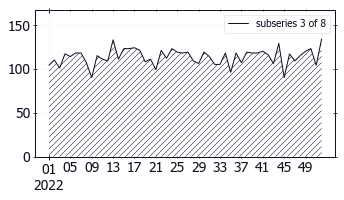

In [28]:
# bijvoorbeeld hoeveel mensen met skill A heb ik per week nodig wanneer iedereen 3 dagen van 8 uren werkt?
series = frame['skill A']._.resample("1w").subseries(3, 8)
series._.area(figsize=(5,3), ylim=(0,None))

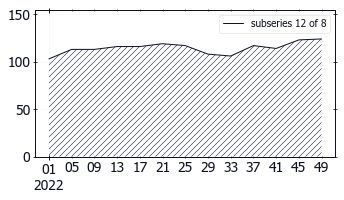

In [30]:
# of hoeveel mensen met skill C heb ik per vier weken nodig wanneer iedereen 12 dagen van 8 uren werkt?
# en hier komt de onzin om de hoek kijken: het algoritme houdt geen enkele rekening met
# de arbeidstijdenwet maar kijkt enkel wat het beste past
series = frame['skill C']._.resample("4w").subseries(12, 8)
series._.area(figsize=(5,3), ylim=(0,None))

# wel valt meteen op dat een planning hiermee natuurlijk fantistisch wordt uitgevlakt

diff_quantity, diff_distribution en diff_skills gebruik je eigenlijk niet. Deze functies worden gebruikt om de complexiteit van een planning te berekenen.

In [37]:
# maar goed, het werkt wel; het fractionele verschil in volume tussen twee opeenvolgende periodes van 4 weken
frame._.resample("4w").diff_quantity()

2022-01-03         NaN
2022-01-31    0.061603
2022-02-28    0.007306
2022-03-28    0.019874
2022-04-25    0.008694
2022-05-23    0.023903
2022-06-20    0.002503
2022-07-18    0.023595
2022-08-15    0.006520
2022-09-12    0.021227
2022-10-10    0.000679
2022-11-07    0.022155
2022-12-05    0.025665
Freq: 28D, dtype: float64

niet groeperen maar uitvlakken

In [45]:
df = frame._.flatten("13w").mean()
df

,skill A,skill B,skill C,skill D
2022-01-03,387.448297,391.647394,394.606012,404.175429
2022-01-04,387.448297,391.647394,394.606012,404.175429
2022-01-05,387.448297,391.647394,394.606012,404.175429
2022-01-06,387.448297,391.647394,394.606012,404.175429
2022-01-07,387.448297,391.647394,394.606012,404.175429
...,...,...,...,...
2022-12-28,411.886041,420.112364,412.731012,409.388703
2022-12-29,411.886041,420.112364,412.731012,409.388703
2022-12-30,411.886041,420.112364,412.731012,409.388703
2022-12-31,411.886041,420.112364,412.731012,409.388703


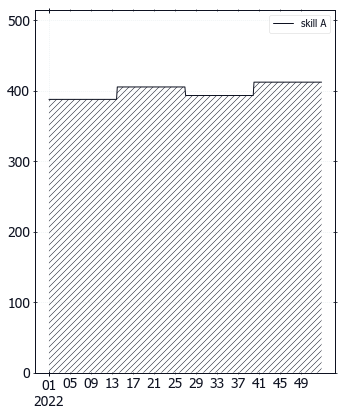

In [50]:
df['skill A']._.area(figsize=(5,6), ylim=(0,None))